In [277]:
#%pip install seaborn

In [278]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

CDIR = r"C:\Users\ppico\OneDrive\Ambiente de Trabalho\UA - Mestrado\Técnicas Matemáticas para Big Data"

os.chdir(CDIR)
for ff in os.listdir():
    print(ff)

assignment1.ipynb
BloomFilter.ipynb
CWB_2021.xlsx
heatmap.ipynb
lesson4.ipynb
WorkAssignmentTemplate.ipynb
~$CWB_2021.xlsx


In [279]:
dfrow = pd.read_excel("CWB_2021.xlsx")
dfrow.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5161 entries, 0 to 5160
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CSD Code 2021               5161 non-null   int64  
 1   CSD Name 2021               5161 non-null   object 
 2   Census Population 2021      5098 non-null   float64
 3   Income 2021                 3615 non-null   float64
 4   Education 2021              3615 non-null   float64
 5   Housing 2021                3615 non-null   float64
 6   Labour Force Activity 2021  3615 non-null   float64
 7   CWB 2021                    4382 non-null   float64
 8   Community Type 2021         5161 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 363.0+ KB


In [280]:
dfrow.drop(columns=['Community Type 2021','CSD Code 2021','CSD Name 2021','Census Population 2021'], inplace=True)

In [281]:
print(dfrow.shape)
df = dfrow.dropna(how='any')
print(df.shape)
df.head(3)

(5161, 5)
(3615, 5)


,Income 2021,Education 2021,Housing 2021,Labour Force Activity 2021,CWB 2021
2,76.0,48.0,97.0,70.0,73.0
4,81.0,63.0,98.0,77.0,80.0
5,78.0,57.0,97.0,74.0,77.0


<AxesSubplot:>

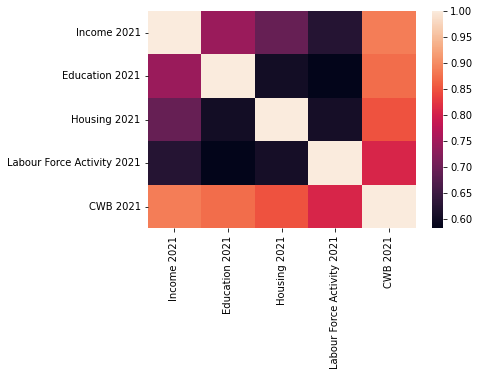

In [282]:
sns.heatmap(df.corr())

Since Labour Force Activity 2021 is the variable with a weaker correlation level to CWB 2021, it is the one that is going to be despised. Therefore, the 3 variables choosen are: Income 2021, Education 2021 and Housing 2021.

In [283]:
df.drop(columns='Labour Force Activity 2021')

,Income 2021,Education 2021,Housing 2021,CWB 2021
2,76.0,48.0,97.0,73.0
4,81.0,63.0,98.0,80.0
5,78.0,57.0,97.0,77.0
6,79.0,59.0,94.0,76.0
10,83.0,56.0,96.0,76.0
...,...,...,...,...
5153,64.0,20.0,54.0,50.0
5154,71.0,31.0,71.0,60.0
5157,84.0,44.0,73.0,70.0
5158,65.0,26.0,52.0,54.0


Determining with quantiles or expertise (literature)

In [284]:
df.quantile([0.25, 0.5, 0.75])

,Income 2021,Education 2021,Housing 2021,Labour Force Activity 2021,CWB 2021
0.25,73.0,52.0,93.0,80.0,75.0
0.50,77.0,58.0,95.0,85.0,79.0
0.75,80.0,63.0,97.0,88.0,81.0


In [285]:

#THIS CODE IS DEPRECATED - IT HAS BEEN REWRITTEN WITH CLASSES

#qt1_income, qt2_income, qt3_income = 0, 0, 0
#qt_income = [qt1_income, qt2_income, qt3_income]
#qt_income_values = df['Income 2021'].quantile([0.25, 0.5, 0.75])
#min_income, max_income = df.min(), df.max()

#for xx in [0,1,2]:
#    qt_income[xx] = int(qt_income_values.iloc[[xx][0]])
#print(qt_income)

#Determining the values
#Q1, Q3 = qt_income[0], qt_income[2]
#LL = max(min_income, (qt_income[0]-(1.5*(Q3-qt_income[0]))))


Defining a function to return the function of a straight line between two points

In [286]:
def lineFromPoints(P, Q):
 
    m = (P[1]-Q[1])/(P[0]-Q[0])
    b = P[1] - m*P[0]
    #print("Função: y=", m,"x + ",b)
    return [1/m, -b/m]
        
def functLine (xpoints, ypoints, part):
    if part == 1:
        P = [xpoints[0],ypoints[0]]
        Q = [xpoints[1],ypoints[1]]
        #print("Ponto P: ", P, " Ponto Q: ", Q)
        return lineFromPoints(P,Q) #Coeficients list

    elif part == 3:
        P = [xpoints[2],ypoints[2]]
        Q = [xpoints[3],ypoints[3]]
        return lineFromPoints(P,Q)

def valueOfx(xpoints,ypoints, part, number): #Returns a new x for a given y and part of graph
        coef_list = functLine(xpoints,ypoints,part)
        return coef_list[0]*number + coef_list[1]

def newXYpoints(xpoints,ypoints,number): #Returns a new list for Xpoints and Ypoints 
     #Input Data: list of X-axis points, list of Y-axis points, membershipDegree for clipping
     xpointsnew = [xpoints[0],valueOfx(xpoints,ypoints,1,number),valueOfx(xpoints,ypoints,3,number),xpoints[3]]
     ypointsnew = [ypoints[0],number,number,ypoints[3]]
     return xpointsnew, ypointsnew

     


Creating a class that is going to give the Q1, Q2, Q3, HL and LL for the given DataSet column

In [287]:
class Points():
    def __init__(self,column): #This function defines quartiles, min and max as attributes
        self.column = column
        self.Q1 = df[column].quantile([0.25]).iloc[[0][0]]
        self.Q2 = df[column].quantile([0.5]).iloc[[0][0]]
        self.Q3 = df[column].quantile([0.75]).iloc[[0][0]]
        self.min = df[column].min()
        self.max = df[column].max()
    
    def ll(self): #This function returns ll
        hl = max(self.min, self.Q1 -(1.5*(self.Q3-self.Q1)))
        return hl
    def hl(self): #This functions returns hl
        hh = min(self.max, self.Q3 + (1.5*(self.Q3 - self.Q1)))
        return hh
        #self.LL = max(self.min, self.Q1 -(1.5*(self.Q3-self.Q1)))
        #self.HL = min(self.max, self.Q3 + (1,5*(self.Q3 - self.Q1)))

Designing the Fuzzy Graph for Income 2021

([<matplotlib.axis.XTick at 0x2d2aa2b9340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

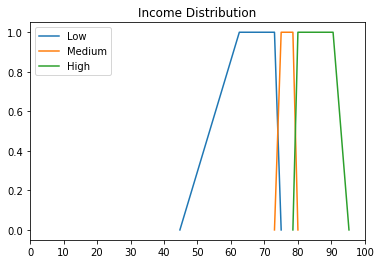

In [288]:
#def IncomePlot():
income_points = Points('Income 2021')
xpoints_low = [(income_points.ll()-0.5*(income_points.ll()-income_points.min)), income_points.ll(), income_points.Q1, 0.5*(income_points.Q1 + income_points.Q2)]
ypoints_low = [0,1,1,0]
income_graph = plt.plot(xpoints_low,ypoints_low)

#xpoints_low_new, ypoints_low_new = newXYpoints(xpoints_low,ypoints_low,0.6)


xpoints_normal = [income_points.Q1, 0.5*(income_points.Q1 + income_points.Q2), 0.5*(income_points.Q2 + income_points.Q3), income_points.Q3]
ypoints_normal = [0,1,1,0]
income_graph = plt.plot(xpoints_normal,ypoints_normal)

xpoints_high = [0.5*(income_points.Q2 + income_points.Q3), income_points.Q3, income_points.hl(), income_points.hl()+0.5*(income_points.max - income_points.hl())]
ypoints_high = [0,1,1,0]
income_graph = plt.plot(xpoints_high,ypoints_high)

plt.title("Income Distribution")
plt.legend(["Low","Medium","High"])
plt.xticks(np.arange(0, 101, step=10))
#plt.fill_between(xpoints_low_new, ypoints_low_new)



Designing the Fuzzy Graph for Education 2021

([<matplotlib.axis.XTick at 0x2d2a9bda6a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

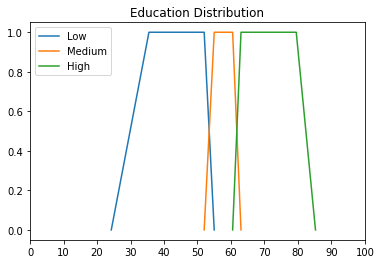

In [289]:
#def EducationPlot():
education_points = Points('Education 2021')
xpoints_low = [(education_points.ll()-0.5*(education_points.ll()-education_points.min)), education_points.ll(), education_points.Q1, 0.5*(education_points.Q1 + education_points.Q2)]
ypoints_low = [0,1,1,0]
plt.plot(xpoints_low,ypoints_low)

xpoints_normal = [education_points.Q1, 0.5*(education_points.Q1 + education_points.Q2), 0.5*(education_points.Q2 + education_points.Q3), education_points.Q3]
ypoints_normal = [0,1,1,0]
plt.plot(xpoints_normal,ypoints_normal)

xpoints_high = [0.5*(education_points.Q2 + education_points.Q3), education_points.Q3, education_points.hl(), education_points.hl()+0.5*(education_points.max - education_points.hl())]
ypoints_high = [0,1,1,0]
plt.plot(xpoints_high,ypoints_high)

plt.title("Education Distribution")
plt.legend(["Low","Medium","High"])
plt.xticks(np.arange(0, 101, step=10))

    #plt.plot(xpoints_low, functionToPlot(xpoints_low, xpoints_low,ypoints_low, 1))
    #plt.fill_between(xpoints_low, [0,0.6,0.6,0], interpolate='True')
    #plt.fill_betweenx()


Designing the Fuzzy Graph for Housing 2021

([<matplotlib.axis.XTick at 0x2d2a9137160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

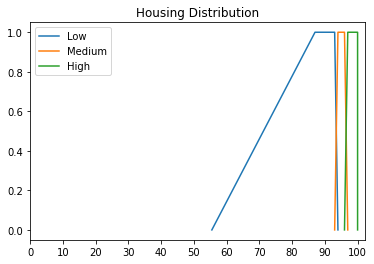

In [290]:
#def HousingPlot():
housing_points = Points('Housing 2021')
xpoints_low = [(housing_points.ll()-0.5*(housing_points.ll()-housing_points.min)), housing_points.ll(), housing_points.Q1, 0.5*(housing_points.Q1 + housing_points.Q2)]
ypoints_low = [0,1,1,0]
plt.plot(xpoints_low,ypoints_low)

xpoints_normal = [housing_points.Q1, 0.5*(housing_points.Q1 + housing_points.Q2), 0.5*(housing_points.Q2 + housing_points.Q3), housing_points.Q3]
ypoints_normal = [0,1,1,0]
plt.plot(xpoints_normal,ypoints_normal)

xpoints_high = [0.5*(housing_points.Q2 + housing_points.Q3), housing_points.Q3, housing_points.hl(), housing_points.hl()+0.5*(housing_points.max - housing_points.hl())]
ypoints_high = [0,1,1,0]
plt.plot(xpoints_high,ypoints_high)

plt.title("Housing Distribution")
plt.legend(["Low","Medium","High"])
plt.xticks(np.arange(0, 101, step=10))


Designing the Fuzy Graph for CWB 2021

In [291]:
#def CwbPlot():
cwb_points = Points('CWB 2021')
xpoints_low_Cwb = [(cwb_points.ll()-0.5*(cwb_points.ll()-cwb_points.min)), cwb_points.ll(), cwb_points.Q1, 0.5*(cwb_points.Q1 + cwb_points.Q2)]
ypoints_low_Cwb = [0,1,1,0]
#plt.plot(xpoints_low_Cwb,ypoints_low_Cwb)

xpoints_normal_Cwb = [cwb_points.Q1, 0.5*(cwb_points.Q1 + cwb_points.Q2), 0.5*(cwb_points.Q2 + cwb_points.Q3), cwb_points.Q3]
ypoints_normal_Cwb = [0,1,1,0]
#plt.plot(xpoints_normal_Cwb,ypoints_normal_Cwb)

xpoints_high_Cwb = [0.5*(cwb_points.Q2 + cwb_points.Q3), cwb_points.Q3, cwb_points.hl(), cwb_points.hl()+0.5*(cwb_points.max - cwb_points.hl())]
ypoints_high_Cwb = [0,1,1,0]
#plt.plot(xpoints_high_Cwb,ypoints_high_Cwb)
def CwbPlot():
    plt.plot(xpoints_low_Cwb,ypoints_low_Cwb)
    plt.plot(xpoints_normal_Cwb,ypoints_normal_Cwb)
    plt.plot(xpoints_high_Cwb,ypoints_high_Cwb)
    plt.title("Community Well Being Distribution")
    plt.legend(["Low","Medium","High"])
    #plt.xticks(np.arange(0, 101, step=10))



Testing for obtaining the membership value

In [292]:
#education_points = Points('Education 2021')
from scipy.interpolate import interp1d
#xpoints_low = [(education_points.ll()-0.5*(education_points.ll()-education_points.min)), education_points.ll(), education_points.Q1, 0.5*(education_points.Q1 + education_points.Q2)]
#xpoints_low_growbar = [(education_points.ll()-0.5*(education_points.ll()-education_points.min)), education_points.ll()]
#ypoints_low_growbar = [0,1]
#interpolation_function = interp1d(xpoints_low_growbar,ypoints_low_growbar)

#print(interpolation_function(35))

In [293]:
#Creating a class for interpolation of membership degree
#Procedure: Create a object from the class Interpolation (ex.: InterpolationTest = Interpolation(education_points))
#Input type: Points() class object

#Use the membershipDegreeCalculator() function to calculate the degree of membership of value to the corresponding levels (Low, Normal & High)
#Example: InterpolationTest.membershipDegreeCalculator(55)
#Input type: Number


class Interpolation:
    def __init__(self, object): #Initialization funtion
        self.object = object
        self.Q1 = self.object.Q1
        self.Q2 = self.object.Q2
        self.Q3 = self.object.Q3
        self.ll = self.object.ll()
        self.hl = self.object.hl()
        self.graphParts()
    

    def graphParts(self): # Sets the intervals for each class based on the quantiles of the Points object
        self.low_part1 = [(self.object.ll()-0.5*(self.object.ll()-self.object.min)), self.object.ll()] #Monotonicity positive
        self.low_part2 = [self.object.ll(), self.object.Q1] #Monocity 0
        self.low_part3 = [self.object.Q1, 0.5*(self.object.Q1 + self.object.Q2)] #Monocity negative
        self.normal_part1 = [self.object.Q1, 0.5*(self.object.Q1 + self.object.Q2)]
        self.normal_part2 = [0.5*(self.object.Q1 + self.object.Q2), 0.5*(self.object.Q2 + self.object.Q3)]
        self.normal_part3 = [0.5*(self.object.Q2 + self.object.Q3), self.object.Q3]
        self.high_part1 = [0.5*(self.object.Q2 + self.object.Q3), self.object.Q3]
        self.high_part2 = [self.object.Q3, self.object.hl()]
        self.high_part3 = [self.object.hl(), self.object.hl()+0.5*(self.object.max - self.object.hl())]

    def interpolationFunction(self, xpoints, ypoints): #Defines the interpolation function
        interpolation_function = interp1d(xpoints,ypoints)
        return interpolation_function(self.number)

    def membershipDegreeCalculator(self,number): #Sets the data points for the interpolation and calculates the membership degree
        self.number = number
        self.membershipDegrees = {'membershipDegreeLow': 0, 'membershipDegreeNormal':0, 'membershipDegreeHigh': 0}

        if (self.number >= self.low_part1[0]) and (self.number <= self.low_part1[1]):
            lstxpoints = self.low_part1
            lstypoints = [0,1]
            self.membershipDegreeLow = self.interpolationFunction(lstxpoints,lstypoints)
            self.membershipDegrees['membershipDegreeLow'] = self.membershipDegreeLow

            
        elif (self.number >= self.low_part2[0]) and (self.number <= self.low_part2[1]):
            lstxpoints = self.low_part2
            lstypoints = [1,1]
            self.membershipDegreeLow = self.interpolationFunction(lstxpoints,lstypoints)
            self.membershipDegrees['membershipDegreeLow'] = self.membershipDegreeLow

        elif (self.number >= self.low_part3[0]) and (self.number <= self.low_part3[1]): 
            lstxpoints = self.low_part3
            lstypoints = [1,0]
            self.membershipDegreeLow = self.interpolationFunction(lstxpoints,lstypoints)
            self.membershipDegrees['membershipDegreeLow'] = self.membershipDegreeLow
            
        if (self.number >= self.normal_part1[0]) and (self.number <= self.normal_part1[1]):
            lstxpoints = self.normal_part1
            lstypoints = [0,1]
            self.membershipDegreeNormal = self.interpolationFunction(lstxpoints,lstypoints)
            self.membershipDegrees['membershipDegreeNormal'] = self.membershipDegreeNormal
            
        elif (self.number >= self.normal_part2[0]) and (self.number <= self.normal_part2[1]):
            lstxpoints = self.normal_part2
            lstypoints = [1,1]
            self.membershipDegreeNormal = self.interpolationFunction(lstxpoints,lstypoints)
            self.membershipDegrees['membershipDegreeNormal'] = self.membershipDegreeNormal

        elif (self.number >= self.normal_part3[0]) and (self.number <= self.normal_part3[1]):
            lstxpoints = self.normal_part3
            lstypoints = [1,0]
            self.membershipDegreeNormal = self.interpolationFunction(lstxpoints,lstypoints)
            self.membershipDegrees['membershipDegreeNormal'] = self.membershipDegreeNormal
            self.membershipDegrees['membershipDegreeNormal'] = self.membershipDegreeNormal

        if (self.number >= self.high_part1[0]) and (self.number <= self.high_part1[1]):
            lstxpoints = self.high_part1
            lstypoints = [0,1]
            self.membershipDegreeHigh = self.interpolationFunction(lstxpoints,lstypoints)
            self.membershipDegrees['membershipDegreeHigh'] = self.membershipDegreeHigh

        elif (self.number >= self.high_part2[0]) and (self.number <= self.high_part2[1]):
            lstxpoints = self.high_part2
            lstypoints = [1,1]
            self.membershipDegreeHigh = self.interpolationFunction(lstxpoints,lstypoints)
            self.membershipDegrees['membershipDegreeHigh'] = self.membershipDegreeHigh

        elif (self.number >= self.high_part3[0]) and (self.number <= self.high_part3[1]):
            lstxpoints = self.high_part3
            lstypoints = [1,0]
            self.membershipDegreeHigh = self.interpolationFunction(lstxpoints,lstypoints)
            self.membershipDegrees['membershipDegreeHigh'] = self.membershipDegreeHigh

        #return f'''The membership degrees are as followed.
        #Membership of Low: {self.membershipDegrees["membershipDegreeLow"]} 
        #Membership of Normal: {self.membershipDegrees["membershipDegreeNormal"]} 
        #Membership of High: {self.membershipDegrees["membershipDegreeHigh"]}'''
        return [self.membershipDegrees["membershipDegreeLow"], self.membershipDegrees["membershipDegreeNormal"], self.membershipDegrees["membershipDegreeHigh"]]



#Testing and Debugging
#InterpolationTest = Interpolation(education_points)
#print(InterpolationTest.membershipDegreeCalculator(61))

In [294]:
#IncomePlot()
#print(income_points)
#HousingPlot()
#CwbPlot()
#EducationPlot()
#income_points, housing_points, education_points, cwb_points = IncomePlot(), HousingPlot(), EducationPlot(), CwbPlot()

Membership for each variable and state

In [324]:
Input = {'Income':0 , 'Housing':0 , 'Education':0}
MembershipDegreesForIncome = {'Low': None, 'Normal': None, 'High': None}
MembershipDegreesForHousing = {'Low': None, 'Normal': None, 'High': None}
MembershipDegreesForEducation = {'Low': None, 'Normal': None, 'High': None}
MembershipDegreesForVariable = {'Income': MembershipDegreesForIncome, 'Housing': MembershipDegreesForHousing, 'Education': MembershipDegreesForEducation}
CwbMembershipDegrees = {'Low': 0, 'Normal':0, 'High':0}
def UpdateMembershipDegrees():
    for key in Input.keys():
        if key == 'Income':
            incomeInterpolation = Interpolation(income_points)
            membershipDegreesValues = incomeInterpolation.membershipDegreeCalculator(Input.get('Income'))
            MembershipDegreesForIncome['Low'] = membershipDegreesValues[0]
            MembershipDegreesForIncome['Normal'] = membershipDegreesValues[1]
            MembershipDegreesForIncome['High'] = membershipDegreesValues[2]
        elif key == 'Housing':
            housingInterpolation = Interpolation(housing_points)
            membershipDegreesValues = housingInterpolation.membershipDegreeCalculator(Input.get('Housing'))
            MembershipDegreesForHousing['Low'] = membershipDegreesValues[0]
            MembershipDegreesForHousing['Normal'] = membershipDegreesValues[1]
            MembershipDegreesForHousing['High'] = membershipDegreesValues[2]

        elif key == 'Education':
            educationInterpolation = Interpolation(education_points)
            membershipDegreesValues = educationInterpolation.membershipDegreeCalculator(Input.get('Education'))
            MembershipDegreesForEducation['Low'] = membershipDegreesValues[0]
            MembershipDegreesForEducation['Normal'] = membershipDegreesValues[1]
            MembershipDegreesForEducation['High'] = membershipDegreesValues[2]
    #For testing purposes - printing the values of membership
    #print(f"""Income Membership - Low: {MembershipDegreesForIncome['Low']}  Normal:{MembershipDegreesForIncome['Normal']} High: {MembershipDegreesForIncome['High']}
    #        Education Membership - Low: {MembershipDegreesForEducation['Low']} Normal: {MembershipDegreesForEducation['Normal']} High: {MembershipDegreesForEducation['High']}
    #        Housing Membership - Low: {MembershipDegreesForHousing['Low']} Normal:{MembershipDegreesForHousing['Normal']} High:{MembershipDegreesForHousing['High']}""")

In [296]:
def InputData(IncomeValue,HousingValue,EducationValue):
    #Defines the values for Income, Housing and Education

    #Input Data: Income, Housing, Education

    Input['Income'] = IncomeValue
    Input['Housing'] = HousingValue
    Input['Education'] = EducationValue
    UpdateMembershipDegrees()

#Testing
#InputData(74,96.5,54)

#EducationPlot()

Implementation of Rules

In [325]:
#if all variables are high, CWB is high - DONE
#if all variables are low, CWB is low - DONE
#if two variables are high and 1 low, CWB is normal
#if two variables are low and 1 normal, CWB is low
#if two variables are low and 1 high, CWB is low
#if all variables are normal, CWB is normal - DONE
#if 1 variable is low, 1 normal and 1 high, CWB is normal

def safe_min(*values):
    filtered_values = [v for v in values if v is not None]
    return min(filtered_values) if filtered_values else 0  # Return 0 if all are None

# Assuming CwbMembershipDegrees has been initialized with {'Low': "", 'Normal': "", 'High': ""}
def RunRules():
    # Rule 1: If all variables are high, CWB is high
    CwbMembershipDegrees['High'] = max(CwbMembershipDegrees['High'], safe_min(MembershipDegreesForIncome['High'], MembershipDegreesForHousing['High'], MembershipDegreesForEducation['High']))

    # Rule 2: If all variables are normal, CWB is normal
    CwbMembershipDegrees['Normal'] = max(CwbMembershipDegrees['Normal'], safe_min(MembershipDegreesForIncome['Normal'], MembershipDegreesForHousing['Normal'], MembershipDegreesForEducation['Normal']))

    # Rule 3: If all variables are low, CWB is low
    CwbMembershipDegrees['Low'] = max(CwbMembershipDegrees['Low'], safe_min(MembershipDegreesForIncome['Low'], MembershipDegreesForHousing['Low'], MembershipDegreesForEducation['Low']))

    # Rule 4: If two variables are high and one is low, CWB is normal
    CwbMembershipDegrees['Normal'] = max(CwbMembershipDegrees['Normal'], safe_min(MembershipDegreesForIncome['Low'], MembershipDegreesForHousing['High'], MembershipDegreesForEducation['High']))
    CwbMembershipDegrees['Normal'] = max(CwbMembershipDegrees['Normal'], safe_min(MembershipDegreesForIncome['High'], MembershipDegreesForHousing['Low'], MembershipDegreesForEducation['High']))
    CwbMembershipDegrees['Normal'] = max(CwbMembershipDegrees['Normal'], safe_min(MembershipDegreesForIncome['High'], MembershipDegreesForHousing['High'], MembershipDegreesForEducation['Low']))

    # Rule 5: If two variables are low and one normal, CWB is low
    CwbMembershipDegrees['Low'] = max(CwbMembershipDegrees['Low'], safe_min(MembershipDegreesForIncome['Low'], MembershipDegreesForHousing['Low'], MembershipDegreesForEducation['Normal']))
    CwbMembershipDegrees['Low'] = max(CwbMembershipDegrees['Low'], safe_min(MembershipDegreesForIncome['Low'], MembershipDegreesForHousing['Normal'], MembershipDegreesForEducation['Low']))
    CwbMembershipDegrees['Low'] = max(CwbMembershipDegrees['Low'], safe_min(MembershipDegreesForIncome['Normal'], MembershipDegreesForHousing['Low'], MembershipDegreesForEducation['Low']))

    # Rule 6: If two variables are low and one high, CWB is low
    CwbMembershipDegrees['Low'] = max(CwbMembershipDegrees['Low'], safe_min(MembershipDegreesForIncome['Low'], MembershipDegreesForHousing['Low'], MembershipDegreesForEducation['High']))
    CwbMembershipDegrees['Low'] = max(CwbMembershipDegrees['Low'], safe_min(MembershipDegreesForIncome['Low'], MembershipDegreesForHousing['High'], MembershipDegreesForEducation['Low']))
    CwbMembershipDegrees['Low'] = max(CwbMembershipDegrees['Low'], safe_min(MembershipDegreesForIncome['High'], MembershipDegreesForHousing['Low'], MembershipDegreesForEducation['Low']))

    # Rule 7: If one variable is low, one normal, and one high, CWB is normal
    CwbMembershipDegrees['Normal'] = max(CwbMembershipDegrees['Normal'], safe_min(MembershipDegreesForIncome['Low'], MembershipDegreesForHousing['Normal'], MembershipDegreesForEducation['High']))
    CwbMembershipDegrees['Normal'] = max(CwbMembershipDegrees['Normal'], safe_min(MembershipDegreesForIncome['Normal'], MembershipDegreesForHousing['Low'], MembershipDegreesForEducation['High']))
    CwbMembershipDegrees['Normal'] = max(CwbMembershipDegrees['Normal'], safe_min(MembershipDegreesForIncome['High'], MembershipDegreesForHousing['Normal'], MembershipDegreesForEducation['Low']))
    CwbMembershipDegrees['Normal'] = max(CwbMembershipDegrees['Normal'], safe_min(MembershipDegreesForIncome['Normal'], MembershipDegreesForHousing['High'], MembershipDegreesForEducation['Low']))
    #print(CwbMembershipDegrees['Low'], CwbMembershipDegrees['Normal'], CwbMembershipDegrees['High'])


In [301]:
def calculate_centroid_from_sets(low_points, normal_points, high_points, low_degree, normal_degree, high_degree):
    """
    Calculates the centroid (center of gravity) for CWB.
    
    Parameters:
    - low_points, normal_points, high_points: Lists of x-values for each fuzzy set.
    - low_degree, normal_degree, high_degree: Membership degrees for each fuzzy set.

    Returns:
    - The centroid (defuzzified value).
    """
    # Combine x points and apply weights (membership degrees)
    all_x_points = low_points + normal_points + high_points
    all_memberships = [low_degree] * len(low_points) + \
                      [normal_degree] * len(normal_points) + \
                      [high_degree] * len(high_points)
    
    # Calculate centroid
    numerator = sum(x * membership for x, membership in zip(all_x_points, all_memberships))
    denominator = sum(all_memberships)
    return numerator / denominator if denominator != 0 else None

In [316]:
def CwbFuzzyPlot(IncomeValue, HousingValue, EducationValue):
    #This function runs the funtions InputData to insert the values of variables, RunRules to apply the rules and CwbPlot to plot the Community Wellbeing graph
    #Input Data: IncomeValue, HousingValue, Education Value
    InputData(IncomeValue,HousingValue,EducationValue)
    RunRules()
    CwbPlot()

    #Clipping for CWB
    #Determining the new points for fill_between()
    NewXPoints_Low, NewYPoints_Low = newXYpoints(xpoints_low_Cwb,ypoints_low_Cwb,CwbMembershipDegrees['Low'])
    NewXPoints_Normal, NewYPoints_Normal = newXYpoints(xpoints_normal_Cwb,ypoints_normal_Cwb,CwbMembershipDegrees['Normal'])
    NewXPoints_High, NewYPoints_High = newXYpoints(xpoints_high_Cwb,ypoints_high_Cwb,CwbMembershipDegrees['High'])
    #Filling the area of CWB membership
    plt.fill_between(NewXPoints_Low, NewYPoints_Low)
    plt.fill_between(NewXPoints_Normal, NewYPoints_Normal)
    plt.fill_between(NewXPoints_High, NewYPoints_High)

    #Defuzzification
    defuzzified_value = calculate_centroid_from_sets(
        NewXPoints_Low, NewXPoints_Normal, NewXPoints_High,
        CwbMembershipDegrees['Low'], CwbMembershipDegrees['Normal'], CwbMembershipDegrees['High']
    )
    
    print("Defuzzified CWB Value (Centroid):", defuzzified_value)
    

Place the values for Income, Housing and Education below (in that order)

('Defuzzified CWB Value (Centroid):', 66.875)

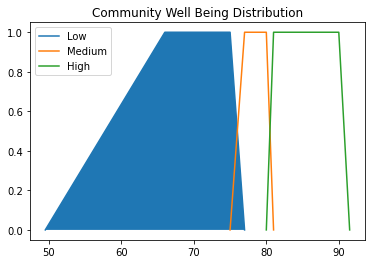

In [326]:
CwbFuzzyPlot(81,93,45)